In [8]:
import torch
import torchvision
import monai
import matplotlib.pyplot as plt
from monai.visualize import blend_images

In [9]:
data = torch.load("../saliency_data.torch")

In [10]:
def plot_3d_image(ret, cmap="gray"):
    fig = plt.figure(figsize=(10, 10))
    
    views = [
        ("Axial", ret[:, ret.shape[1] // 2, :, :]),
        ("Coronal", ret[:, :, ret.shape[2] // 2, :]),
        ("Sagittal", ret[:, :, :, ret.shape[3] // 2])
    ]
    
    for idx, (title, slice_data) in enumerate(views, 1):
        plt.subplot(3, 1, idx)
        plt.imshow(slice_data.permute(1, 2, 0), cmap=cmap)
        plt.title(title)
        plt.axis("off")
    
    plt.show()

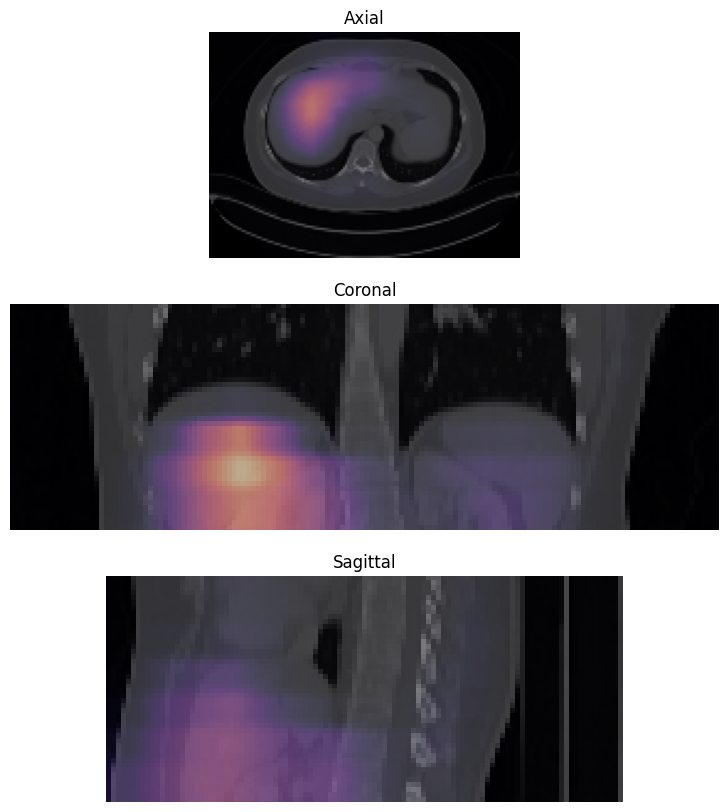

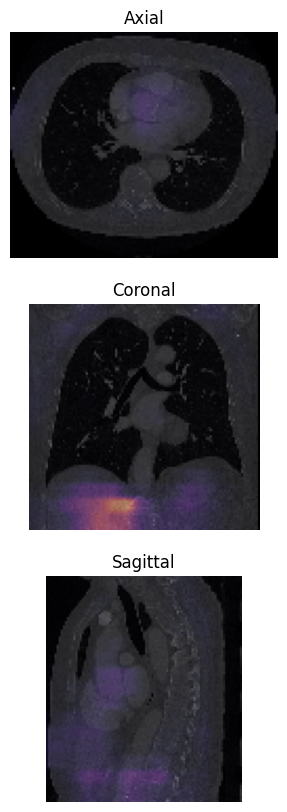

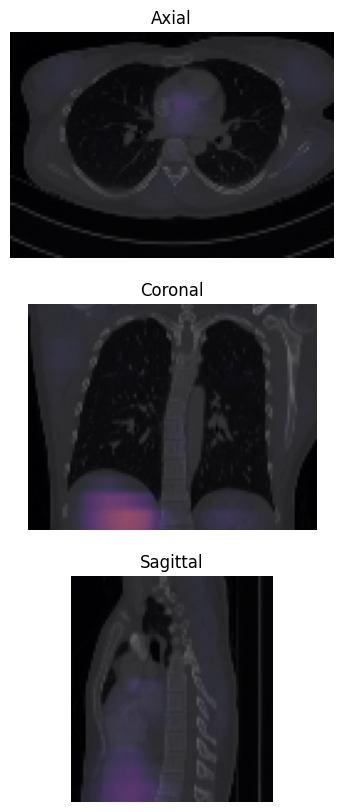

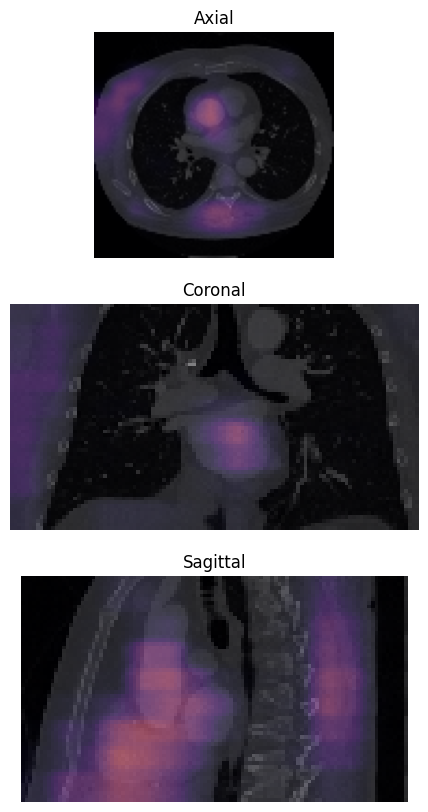

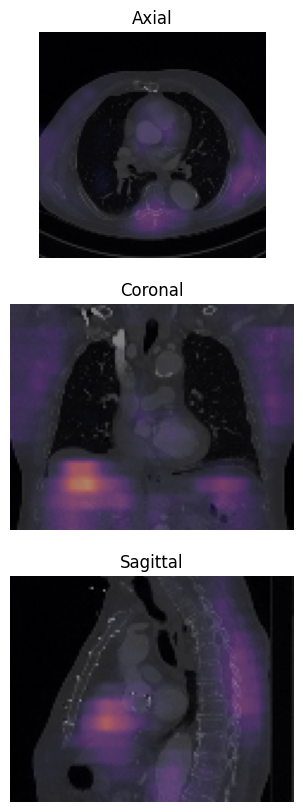

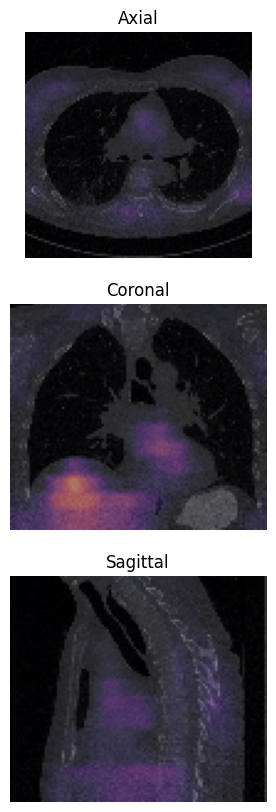

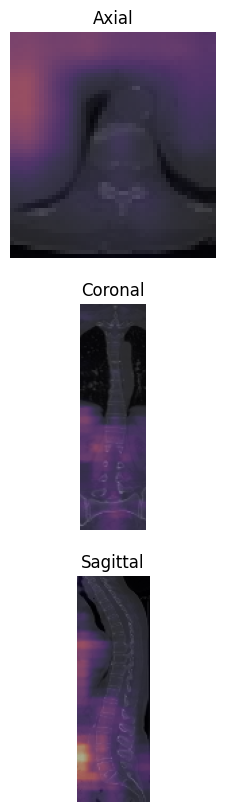

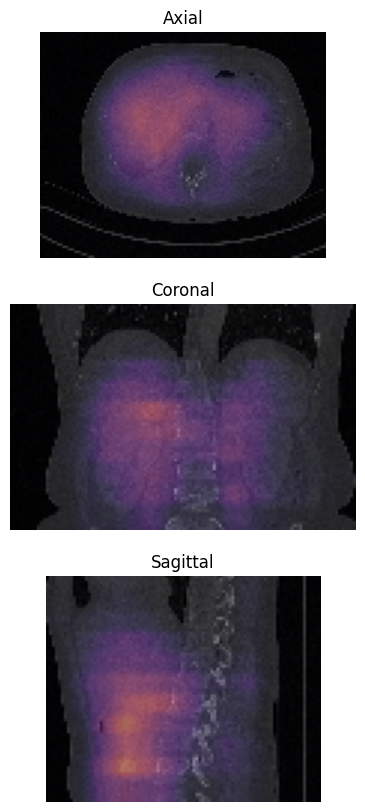

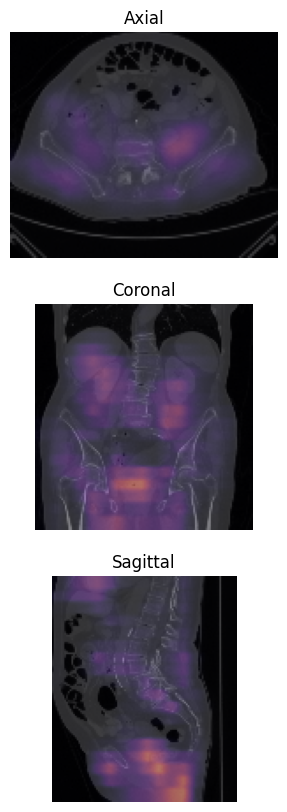

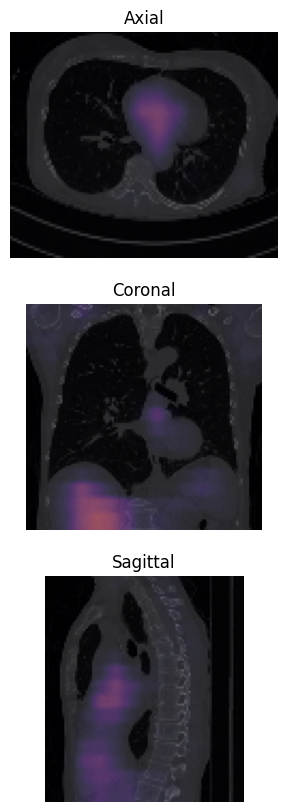

In [47]:
for distance, x in zip(data["distance_maps"], data["original_images"]):
    # distance = torch.exp(distance / 100)
    distance = torchvision.transforms.GaussianBlur(kernel_size=7, sigma=4.0)(distance.unsqueeze(0)).squeeze(0)
    ret = blend_images(x[0].flip(1), distance.unsqueeze(0).flip(1), cmap="magma", alpha=0.5)
    plot_3d_image(ret.cpu())